<a href="https://colab.research.google.com/github/HanzhouLiu/Deep-Learning-with-Python-Exercises/blob/main/1dCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
max_len = 500  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(
    optimizer=RMSprop(lr=1e-4),
    loss='binary_crossentropy',
    metrics=['acc']
)

history = model.fit(
    x_train, 
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

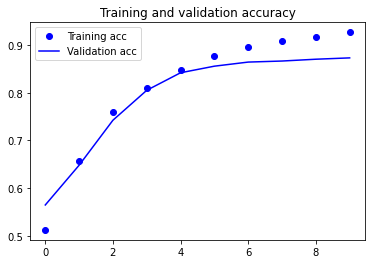

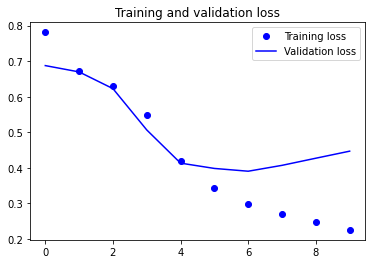

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save("/content/drive/MyDrive/636/homework/1dCNN.h5")

In [14]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/636/homework/1dCNN.h5')

In [15]:
! mkdir /tmp/my_log_dir
callbacks = [
    keras.callbacks.TensorBoard(
        log_dir='/tmp/my_log_dir',
        histogram_freq=1,
        embeddings_freq=1,
    )
]
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=callbacks)	


Epoch 1/20
157/157 [==============================] - 73s 460ms/step - loss: 0.2678 - acc: 0.9322 - val_loss: 0.3400 - val_acc: 0.9252
Epoch 2/20
157/157 [==============================] - 72s 461ms/step - loss: 0.2028 - acc: 0.9567 - val_loss: 0.3444 - val_acc: 0.9226
Epoch 3/20
157/157 [==============================] - 72s 460ms/step - loss: 0.1533 - acc: 0.9769 - val_loss: 0.4022 - val_acc: 0.9134
Epoch 4/20
157/157 [==============================] - 72s 458ms/step - loss: 0.1142 - acc: 0.9875 - val_loss: 1.5401 - val_acc: 0.7922
Epoch 5/20
157/157 [==============================] - 72s 459ms/step - loss: 0.1037 - acc: 0.9888 - val_loss: 0.9533 - val_acc: 0.8674
Epoch 6/20
157/157 [==============================] - 72s 458ms/step - loss: 0.0919 - acc: 0.9913 - val_loss: 0.5798 - val_acc: 0.9160
Epoch 7/20
157/157 [==============================] - 72s 458ms/step - loss: 0.0882 - acc: 0.9918 - val_loss: 0.6352 - val_acc: 0.9158
Epoch 8/20
157/157 [==============================] - 7

In [17]:
! tensorboard --logdir='/tmp/my_log_dir'/ --host localhost --port 8088

2021-03-16 20:14:27.275162: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
TensorBoard 2.4.1 at http://localhost:8088/ (Press CTRL+C to quit)
^C


In [18]:
!pip install pydot 
! pip install pydot-ng

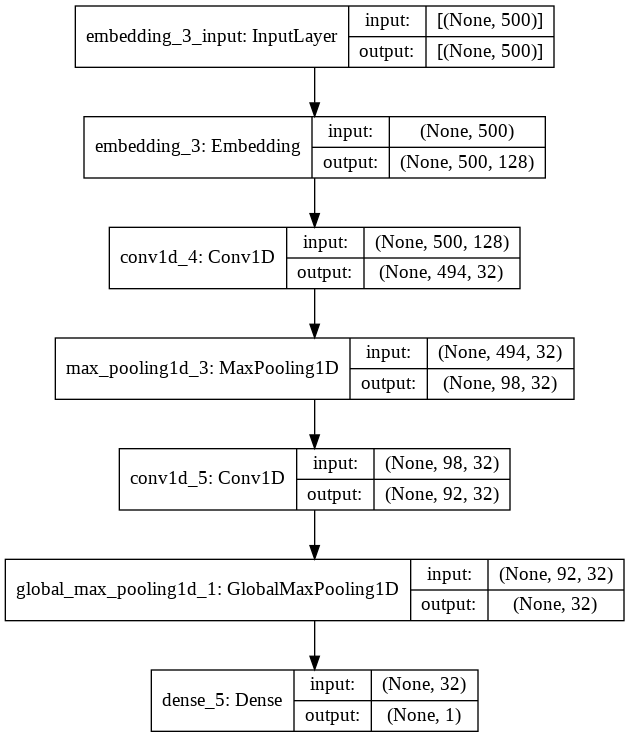

In [19]:
from keras.utils import plot_model

plot_model(model, show_shapes=True, to_file='/tmp/model.png')